# K-Means Clustering in Python | machine learning via Scikit-learn  and how to Save ML model
## Day-15 to Day-25:Machine Learning  done



Written by: M.Danish Azeem\
Date: 01.24.2024\
Email: danishazeem365@gmail.com

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# import the data in features
x = df[['age','fare']]
x.age.fillna(value = x['age'].mean(), inplace=True)

# scaled data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# perform clustring
model = KMeans(n_clusters=5)
model.fit(x_scaled)

# assign cluster labels to thev data
df['cluster'] = model.labels_

C:\Users\Danish\AppData\Local\Temp\ipykernel_13340\1981577419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.age.fillna(value = x['age'].mean(), inplace=True)
c:\Users\Danish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,4
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,3
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,2
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,2


In [4]:
df['cluster'].unique()

array([2, 4, 0, 3, 1])

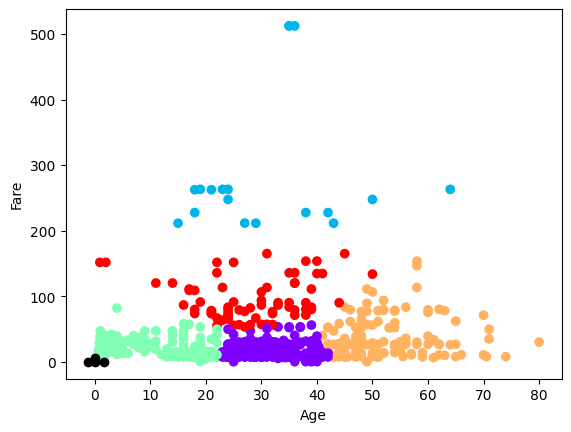

In [5]:
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap='rainbow')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], color='black')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Assignment # 1

# Time stamp 

# plotly kay zarey plots bnaney hain our har cluster ko sapretle show kir kay dekna ha


In [6]:
import plotly.express as px
fig =px.scatter(df, x='age', y='fare', color='cluster')
fig.show()

In [7]:
import plotly.express as px
fig =px.scatter_3d(df, x='age', y='fare',z='pclass', color='cluster')
fig.show()

In [8]:
import plotly.express as px

# Assuming df has columns 'age', 'fare', 'pclass', and 'cluster'
fig = px.scatter_3d(df, x='age', y='fare', z='pclass', color='cluster')

# Customizing the marker properties
fig.update_traces(marker=dict(size=8, symbol='circle', opacity=0.7))

fig.show()


In [9]:
fig = px.parallel_coordinates(df, color='cluster')
fig.show()

In [10]:
# saving the model
import joblib
joblib.dump(model, 'KMeansClustering.joblib')

['KMeansClustering.joblib']

In [32]:
# load the saved model
model_loaded = joblib.load('KMeansClustering.joblib')

In [33]:
import seaborn as sns

df_1 = sns.load_dataset('tips')
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [34]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [35]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1['smoker'])

df_1['smoker'] = le.transform(df_1['smoker'])

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1['day'])

df_1['day'] = le.transform(df_1['day'])

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1['time'])

df_1['time'] = le.transform(df_1['time'])

In [39]:
x = df_1.drop(columns=['sex'])
y = df_1['sex']

In [40]:
x.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [41]:
y.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [42]:
x = pd.get_dummies(x, columns=['smoker'])

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [44]:
joblib.dump(model, "tipswalamodel.joblib")

['tipswalamodel.joblib']

In [45]:
# load the saved model
model_1 = joblib.load('tipswalamodel.joblib')

In [49]:
import pickle
#save the model
# Save the model  
with open('model.pkl', 'wb') as f:     # 'wb' write bineres
    pickle.dump(model, f)

# Load the model
with open('model.pkl', 'rb') as f:     # 'rb'# write bineres
    model = pickle.load(f)